# Used Cars Price Prediction Problem Statement:
In this Problem we have data of some used cars and we need to create a model to predict how much should this sells 
## Data Columns
* Index : should be dropped indicates ID
* Name : The brand and model of the car.
* Location : The location in which the car is being sold or is available for purchase.
* Year: The year or edition of the model.
* Kilometer_Driven: The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : if he was the first owner or Second .. etc
* Milage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.
* Price : the Price of the used car

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-cars-price-prediction/test-data.csv
/kaggle/input/used-cars-price-prediction/train-data.csv


# Data Investegation 

In [2]:
df = pd.read_csv('/kaggle/input/used-cars-price-prediction/train-data.csv')

In [3]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# EDA

In [4]:
df.dtypes[df.dtypes=='object']

Name            object
Location        object
Fuel_Type       object
Transmission    object
Owner_Type      object
Mileage         object
Engine          object
Power           object
New_Price       object
dtype: object

In [5]:
df.columns = df.columns.str.lower().str.replace(" ","_")

In [6]:
# Standarize the values
for col in list(df.dtypes[df.dtypes == 'object'].index):
    df[col] = df[col].str.lower().str.replace(" ","_")
    

In [7]:
df.isnull().sum()

unnamed:_0              0
name                    0
location                0
year                    0
kilometers_driven       0
fuel_type               0
transmission            0
owner_type              0
mileage                 2
engine                 36
power                  36
seats                  42
new_price            5195
price                   0
dtype: int64

## Checking Duplicates

In [8]:
df.duplicated().sum()

0

## I dropped the NAN values it will be better if we filled it with mean or median 

In [9]:
df.dropna(inplace=True)

### Plotting Target

<Axes: xlabel='price', ylabel='Count'>

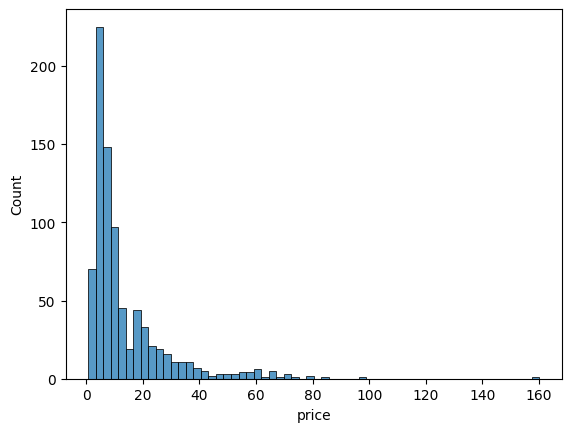

In [10]:

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.histplot(df.price)

## Long Tail Diagram need to get rid of it through log function

In [11]:
target = np.log1p(df.price)

<Axes: xlabel='price', ylabel='Count'>

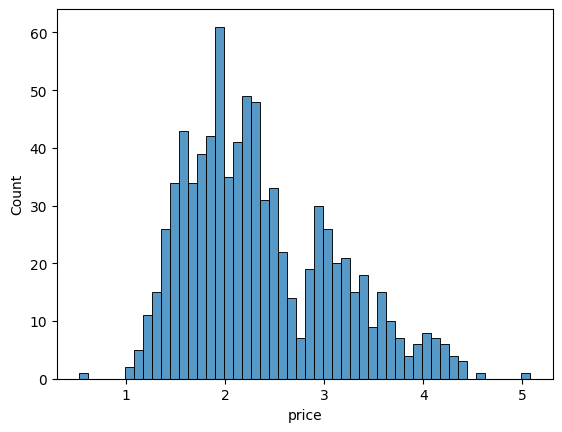

In [12]:
sns.histplot(target , bins=50)

### Got the Normal distribution diagram which will help the model prediction to be better

In [13]:
df.dtypes[df.dtypes=='object']

name            object
location        object
fuel_type       object
transmission    object
owner_type      object
mileage         object
engine          object
power           object
new_price       object
dtype: object

In [14]:
df.fuel_type.value_counts() 

fuel_type
diesel    443
petrol    371
cng         9
Name: count, dtype: int64

In [15]:
df.transmission.value_counts() 

transmission
manual       512
automatic    311
Name: count, dtype: int64

In [16]:
df.owner_type.value_counts()

owner_type
first     765
second     55
third       3
Name: count, dtype: int64

In [17]:
df.mileage.value_counts()

mileage
24.3_kmpl      36
18.9_kmpl      32
22.5_kmpl      28
28.4_kmpl      27
11.36_kmpl     23
               ..
32.26_km/kg     1
21.72_kmpl      1
17.84_kmpl      1
12.62_kmpl      1
13.7_kmpl       1
Name: count, Length: 152, dtype: int64

In [18]:
df.engine.value_counts()

engine
1248_cc    92
1197_cc    81
998_cc     64
1498_cc    55
1995_cc    53
2755_cc    37
1497_cc    35
1199_cc    33
1198_cc    21
1798_cc    20
2393_cc    20
1591_cc    20
1968_cc    19
1582_cc    17
1461_cc    17
799_cc     16
2143_cc    15
1193_cc    14
1956_cc    14
1999_cc    13
1196_cc    12
999_cc     11
2987_cc    11
1186_cc    10
2993_cc    10
1598_cc    10
2179_cc    10
1364_cc     9
1950_cc     8
1496_cc     8
1998_cc     8
2523_cc     7
2477_cc     6
1462_cc     6
2967_cc     4
2996_cc     4
1194_cc     3
1969_cc     3
1493_cc     3
2894_cc     2
1396_cc     2
2489_cc     2
2498_cc     2
1991_cc     2
2198_cc     1
1997_cc     1
1086_cc     1
2925_cc     1
4951_cc     1
2487_cc     1
1984_cc     1
1395_cc     1
2995_cc     1
2999_cc     1
1595_cc     1
2694_cc     1
1368_cc     1
1047_cc     1
Name: count, dtype: int64

In [19]:
df.power.value_counts()

power
190_bhp       55
81.86_bhp     41
88.5_bhp      39
67.04_bhp     38
88.7_bhp      32
              ..
174.57_bhp     1
67.05_bhp      1
99.6_bhp       1
58.2_bhp       1
103_bhp        1
Name: count, Length: 115, dtype: int64

In [20]:
df.new_price.value_counts()

new_price
95.13_lakh    6
4.78_lakh     6
63.71_lakh    6
11.26_lakh    5
44.28_lakh    5
             ..
39.6_lakh     1
1.27_cr       1
38.11_lakh    1
8.12_lakh     1
9.93_lakh     1
Name: count, Length: 540, dtype: int64

# Data Encoding

In [21]:
df.owner_type = df.owner_type.map({'first':1, 'second':2, 'third':3, 'fourth & above':4})
df.fuel_type = df.fuel_type.map({'diesel':1, 'petrol':2, 'cng':3})
df.transmission = df.transmission.map({'manual':1, 'automatic':2})

In [22]:
df['engine'] = df['engine'].str.rstrip('_cc')
df['power'] = df['power'].str.rstrip('_bhp')
df['mileage'] = df['mileage'].str.rstrip('_kmpl')
df['mileage'] = df['mileage'].str.rstrip('_km/kg').astype('float')

In [23]:
df['engine'] = df['engine'].astype('float')
df['power']=pd.to_numeric(df['power'] , errors = 'coerce') 

In [24]:
df.head()

,unnamed:_0,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price
2,2,honda_jazz_v,chennai,2011,46000,2,1,1,18.20,1199.0,88.70,5.0,8.61_lakh,4.50
7,7,toyota_innova_crysta_2.8_gx_at_8s,mumbai,2016,36000,1,2,1,11.36,2755.0,171.50,8.0,21_lakh,17.50
10,10,maruti_ciaz_zeta,kochi,2018,25692,2,1,1,21.56,1462.0,103.25,5.0,10.65_lakh,9.95
15,15,mitsubishi_pajero_sport_4x4,delhi,2014,110000,1,1,1,13.50,2477.0,175.56,7.0,32.01_lakh,15.00
20,20,bmw_3_series_320d,kochi,2014,32982,1,2,1,22.69,1995.0,190.00,5.0,47.87_lakh,18.55


In [25]:
df['new_price'] = df['new_price'].str.rstrip('_lakh')
df['new_price'] = df['new_price'].str.rstrip('_cr').astype('float')

In [26]:
df.dtypes

unnamed:_0             int64
name                  object
location              object
year                   int64
kilometers_driven      int64
fuel_type              int64
transmission           int64
owner_type             int64
mileage              float64
engine               float64
power                float64
seats                float64
new_price            float64
price                float64
dtype: object

In [27]:
df.head()
df.drop("price",inplace=True,axis=1)
df.drop("name",inplace=True,axis=1)
df.drop("location",inplace=True,axis=1)

# Data Splitting

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(df,target,test_size=0.2,random_state=42)

# Model Training

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

# Model Evaluation

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = lr.predict(x_val)

# Model Evaluation
print('Training Score: ', lr.score(x_train, y_train))
print('Testing Score: ', lr.score(x_val, y_val))
print('RMSE: ', np.sqrt(mean_squared_error(y_val, lr.predict(x_val))))

Training Score:  0.8737659029014575
Testing Score:  0.8942527093054862
RMSE:  0.24981309961424952


In [31]:
prices = np.expm1(lr.predict(x_val))
print("Price is USD: " ,prices[0] * 1219)

Price is USD:  13444.145816079332


# Prediction with Test Data 

In [32]:
df_test = pd.read_csv('/kaggle/input/used-cars-price-prediction/test-data.csv')

## Use the same standrization we did above

In [33]:
df_test.columns =df_test.columns.str.lower().str.replace(" ","_")
for col in list(df_test.dtypes[df_test.dtypes == 'object'].index):
    df_test[col] = df_test[col].str.lower().str.replace(" ","_")

In [34]:
df_test.dropna(inplace=True)

In [35]:
df_test.owner_type = df_test.owner_type.map({'first':1, 'second':2, 'third':3, 'fourth & above':4})
df_test.fuel_type = df_test.fuel_type.map({'diesel':1, 'petrol':2, 'cng':3})
df_test.transmission =df_test.transmission.map({'manual':1, 'automatic':2})
df_test['engine'] = df_test['engine'].str.rstrip('_cc')
df_test['power'] = df_test['power'].str.rstrip('_bhp')
df_test['mileage'] = df_test['mileage'].str.rstrip('_kmpl')
df_test['mileage'] = df_test['mileage'].str.rstrip('_km/kg').astype('float')
df_test['engine'] = df_test['engine'].astype('float')
df_test['power']=pd.to_numeric(df_test['power'] , errors = 'coerce') 
df_test['new_price'] = df_test['new_price'].str.rstrip('_lakh')
df_test['new_price'] = df_test['new_price'].str.rstrip('_cr').astype('float')

In [36]:
target = np.log1p(df_test.new_price)

In [37]:
df_test.drop("name",inplace=True,axis=1)
df_test.drop("location",inplace=True,axis=1)

In [38]:
df_test

,unnamed:_0,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price
2,2,2017,34000,1,1,1,13.68,2393.0,147.80,7.0,25.27
30,30,2014,70000,1,1,2,23.59,1364.0,67.06,5.0,9.27
36,36,2017,13500,2,2,1,14.84,1598.0,103.52,5.0,14.95
39,39,2012,66889,1,2,1,22.48,1995.0,190.00,5.0,70.43
43,43,2018,4000,2,1,1,15.41,1598.0,103.52,5.0,11.89
...,...,...,...,...,...,...,...,...,...,...,...
1209,1209,2016,41413,1,1,1,27.28,1047.0,69.00,5.0,7.06
1212,1212,2017,39015,2,1,1,17.00,1497.0,121.36,5.0,8.79
1213,1213,2018,6000,2,1,1,16.00,1368.0,160.00,5.0,18.16
1216,1216,2017,21380,1,1,1,24.30,1248.0,88.50,5.0,10.57


In [39]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = lr.predict(df_test)

# Model Evaluation
print('Testing Score: ', lr.score(df_test, target))
print('RMSE: ', np.sqrt(mean_squared_error(target, lr.predict(df_test))))

Testing Score:  0.37895573413758754
RMSE:  0.6000104179987423
